In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

(-0.5, 27.5, 27.5, -0.5)

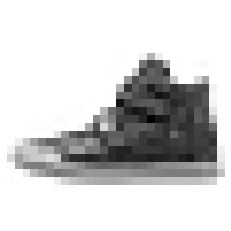

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[142], cmap="binary")
plt.axis('off')
#plt.show()

In [4]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
"sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[142]]

'but'

In [5]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
model.summary()
#tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [8]:
import os
root_logdir = os.path.join(os.curdir, "image_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [9]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, callbacks=[tensorboard_cb])

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7164 - accuracy: 0.7650 - val_loss: 0.5245 - val_accuracy: 0.8148
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4899 - accuracy: 0.8303 - val_loss: 0.5046 - val_accuracy: 0.8185
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4451 - accuracy: 0.8454 - val_loss: 0.4320 - val_accuracy: 0.8468
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4169 - accuracy: 0.8553 - val_loss: 0.4230 - val_accuracy: 0.8475
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3973 - accuracy: 0.8616 - val_loss: 0.4060 - val_accuracy: 0.8557
Epoch 6/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3812 - accuracy: 0.8659 - val_loss: 0.3955 - val_accuracy: 0.8607
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3671 - accuracy: 0.8715 - val_loss: 0.4096 - val_accuracy:

Prediction: but
Confidence: 0.999571
Truth: but


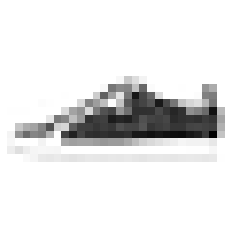

In [10]:
import numpy as np
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
#plt.show()

In [11]:
#%load_ext tensorboard

In [12]:
#%tensorboard --logdir ./image_logs

Reusing TensorBoard on port 6006 (pid 16856), started 0:12:53 ago. (Use '!kill 16856' to kill it.)

In [13]:
model.save('fashion_clf.h5')

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [15]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [38]:
model = keras.models.Sequential([keras.layers.Dense(30,
activation="relu",
input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 30)                270       
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [41]:
es = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

In [42]:
root_logdir = os.path.join(os.curdir, "housing_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [43]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb, es])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.8395 - val_loss: 0.6365
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4548 - val_loss: 0.4354
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4215 - val_loss: 0.4112
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3998 - val_loss: 0.3988
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3909 - val_loss: 0.3907
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3862 - val_loss: 0.3865
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3787 - val_loss: 0.4002
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3777 - val_loss: 0.3764
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3892 - val_loss: 0.3775
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3774 - val_lo

In [22]:
#%tensorboard --logdir ./housing_logs

Reusing TensorBoard on port 6007 (pid 16863), started 0:12:35 ago. (Use '!kill 16863' to kill it.)

In [23]:
model.save("reg_housing_1.h5")

Second model

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(1))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                270       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [26]:
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [27]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb, es])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7760 - val_loss: 0.4971
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4363 - val_loss: 0.4192
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4025 - val_loss: 0.3872
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3919 - val_loss: 0.3881
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3926 - val_loss: 0.3660
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3853 - val_loss: 0.3773
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3718 - val_loss: 0.3560
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3591 - val_loss: 0.3520
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3546 - val_loss: 0.3461
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3537 - val_lo

In [28]:
#%tensorboard --logdir ./housing_logs

Reusing TensorBoard on port 6007 (pid 16863), started 0:12:44 ago. (Use '!kill 16863' to kill it.)

In [29]:
model.save("reg_housing_2.h5")

Third model

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(60, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(60, activation="relu",))
model.add(keras.layers.Dense(1))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 60)                540       
                                                                 
 dense_9 (Dense)             (None, 60)                3660      
                                                                 
 dense_10 (Dense)            (None, 1)                 61        
                                                                 
Total params: 4,261
Trainable params: 4,261
Non-trainable params: 0
_________________________________________________________________


In [32]:
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [33]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb, es])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7023 - val_loss: 0.5040
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4515 - val_loss: 0.3962
Epoch 3/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3919 - val_loss: 0.4013
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3756 - val_loss: 0.4350
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3653 - val_loss: 0.4627
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3855 - val_loss: 0.3578
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3625 - val_loss: 0.3763
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3515 - val_loss: 0.3688
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3506 - val_loss: 0.4956
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3487 - val_lo

In [34]:
#%tensorboard --logdir ./housing_logs

Reusing TensorBoard on port 6007 (pid 16863), started 0:12:53 ago. (Use '!kill 16863' to kill it.)

In [35]:
model.save("reg_housing_3.h5")